In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D

In [4]:
mnist = tf.keras.datasets.mnist

In [68]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [69]:
x_train, x_test = x_train/255, x_test/255

In [70]:
x_train.shape

(60000, 28, 28)

In [71]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [40]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(28,28,1)),)
model.add(MaxPooling2D((2,2),strides=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),strides=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

In [43]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [45]:
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 45s 23ms/step - loss: 0.1648 - accuracy: 0.9580 - val_loss: 0.0521 - val_accuracy: 0.9833
Epoch 2/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0572 - accuracy: 0.9826 - val_loss: 0.0372 - val_accuracy: 0.9884
Epoch 3/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0420 - accuracy: 0.9870 - val_loss: 0.0446 - val_accuracy: 0.9862
Epoch 4/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0370 - accuracy: 0.9894 - val_loss: 0.0407 - val_accuracy: 0.9884
Epoch 5/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0316 - accuracy: 0.9906 - val_loss: 0.0490 - val_accuracy: 0.9852
Epoch 6/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0289 - accuracy: 0.9912 - val_loss: 0.0391 - val_accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0235 - accuracy: 0.9929 - val_loss: 0.0483 -

In [48]:
y_prob = model.predict(x_test)
import numpy as np
y_pred = np.argmax(y_prob,axis=1)

313/313 [==============================] - 5s 17ms/step


In [50]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [57]:
y_pred[10]

0

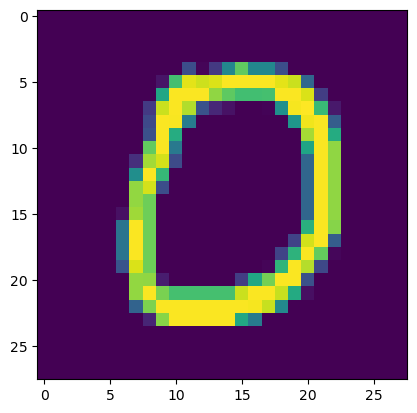

In [58]:
import matplotlib.pyplot as plt
plt.imshow(x_test[10])

In [59]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(28,28,1)))
model.add(Dense(10,activation='softmax'))

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 28, 28, 64)        128       
                                                                 
 dense_4 (Dense)             (None, 28, 28, 10)        650       
                                                                 
Total params: 778 (3.04 KB)
Trainable params: 778 (3.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [62]:
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10


ValueError: in user code:

    File "C:\Users\91866\anaconda\lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\91866\anaconda\lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\91866\anaconda\lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\91866\anaconda\lib\site-packages\keras\src\engine\training.py", line 1127, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\91866\anaconda\lib\site-packages\keras\src\engine\training.py", line 1185, in compute_loss
        return self.compiled_loss(
    File "C:\Users\91866\anaconda\lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\91866\anaconda\lib\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\91866\anaconda\lib\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\91866\anaconda\lib\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "C:\Users\91866\anaconda\lib\site-packages\keras\src\backend.py", line 5777, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(32,) and logits.shape=(25088, 10)


In [83]:
model = Sequential()
model.add(Conv2D(6,kernel_size=(5,5),strides=(1,1),activation='tanh',input_shape=(28,28,1)))
model.add(AveragePooling2D((2,2),strides=(1,1)))
model.add(Conv2D(6,kernel_size=(5,5),strides=(1,1),activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_14 (Aver  (None, 23, 23, 6)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_22 (Conv2D)          (None, 19, 19, 6)         906       
                                                                 
 average_pooling2d_15 (Aver  (None, 9, 9, 6)           0         
 agePooling2D)                                                   
                                                                 
 flatten_9 (Flatten)         (None, 486)               0         
                                                                 
 dense_25 (Dense)            (None, 120)             

In [84]:
model.fit(x_train,y_train)

1875/1875 [==============================] - 30s 15ms/step - loss: 0.2062 - accuracy: 0.9388
